### Direct Bank Marketing

Objective: To build a predictive model to help the bank in their next marketing campaign

    The data in this project is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on direct phone calls to convince customers to open a deposit account. 

Dataset Dictionary:

Variable             Description
Age:              Customer age at the contact date (Numeric ≥18)
Job_Category:	  Customer job category
Marital_Status:	  Customer marital status: married, single, divorced, widowed, separated
Education:        Customer education level
Credit_Default:   Customer has credit in default? (binary: "yes", "no")
Balance:	      Customer annual average balance in euro currency
Housing_Loan:	  Customer has housing loan? (binary: "yes", "no")
Personal_Loan: 	  Customer has personal loan? (binary: "yes", "no")
Contact_Type:	  Contact communication type (categorical: "unknown", "telephone", "cellular")
Call_Day:	      Last contact day of the month
Call_Month:	      Last contact month of year (categorical)
Call_Duration:	  Last contact duration, in seconds
Campaign_Calls:	  Number of contacts performed during this campaign and for this client (numeric, includes last contact)
PDays:	          Number of days that passed by after the client was last contacted (-1 means client not previously contacted)
PContact:	      Number of contacts performed before this campaign and for this client
POutcome:	      Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

Deposit_Subscription (Target Variable):	Flag indicating client term deposit subscription status -- 1= customer has subscribed to a term deposit, 0= customer has not subscribed to a term deposit




#### Imports

In [42]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

#### Reading the dataset

In [43]:
# Load the dataset

df = pd.read_csv('C:\\Users\\samri\\Documents\\C04_Data_Bank_Campaign.csv')

#### Printing the variables

In [44]:
# Print the variables

print("Variables : ")
print(df.head())

Variables : 
   Age  Job_Category Marital_Status  Education Credit_Default  Balance  \
0   58    management        married   tertiary             no     2143   
1   44    technician         single  secondary             no       29   
2   33  entrepreneur        married  secondary             no        2   
3   47   blue-collar        married    unknown             no     1506   
4   33       unknown         single    unknown             no        1   

  Housing_Loan Personal_Loan Contact_Type  Call_Day Call_Month  Call_Duration  \
0          yes            no      unknown         5        may            261   
1          yes            no      unknown         5        may            151   
2          yes           yes      unknown         5        may             76   
3          yes            no      unknown         5        may             92   
4           no            no      unknown         5        may            198   

   Campaign_Calls  PDays  PContact POutcome  Deposit_Su

#### Printing the variable types

In [45]:
# Print info about the dataset

print("\n Info about the Dataset")
print(df.info())


 Info about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   45211 non-null  int64 
 1   Job_Category          45211 non-null  object
 2   Marital_Status        45211 non-null  object
 3   Education             45211 non-null  object
 4   Credit_Default        45211 non-null  object
 5   Balance               45211 non-null  int64 
 6   Housing_Loan          45211 non-null  object
 7   Personal_Loan         45211 non-null  object
 8   Contact_Type          45211 non-null  object
 9   Call_Day              45211 non-null  int64 
 10  Call_Month            45211 non-null  object
 11  Call_Duration         45211 non-null  int64 
 12  Campaign_Calls        45211 non-null  int64 
 13  PDays                 45211 non-null  int64 
 14  PContact              45211 non-null  int64 
 15  POutcome   

#### Summary Statistics

In [46]:
# Print summary statistics

print("\nSummary Statistics : ")
print(df.describe())


Summary Statistics : 
                Age        Balance      Call_Day  Call_Duration  \
count  45211.000000   45211.000000  45211.000000   45211.000000   
mean      40.936210    1362.272058     15.806419     258.163080   
std       10.618762    3044.765829      8.322476     257.527812   
min       18.000000   -8019.000000      1.000000       0.000000   
25%       33.000000      72.000000      8.000000     103.000000   
50%       39.000000     448.000000     16.000000     180.000000   
75%       48.000000    1428.000000     21.000000     319.000000   
max       95.000000  102127.000000     31.000000    4918.000000   

       Campaign_Calls         PDays      PContact  Deposit_Subscription  
count    45211.000000  45211.000000  45211.000000          45211.000000  
mean         2.763841     40.197828      0.580323              0.116985  
std          3.098021    100.128746      2.303441              0.321406  
min          1.000000     -1.000000      0.000000              0.000000  
25%

#### Checking for missing values

In [47]:
# Check for missing values

print("\nMissing Values")
print(df.isnull().sum())


Missing Values
Age                     0
Job_Category            0
Marital_Status          0
Education               0
Credit_Default          0
Balance                 0
Housing_Loan            0
Personal_Loan           0
Contact_Type            0
Call_Day                0
Call_Month              0
Call_Duration           0
Campaign_Calls          0
PDays                   0
PContact                0
POutcome                0
Deposit_Subscription    0
dtype: int64


No missing values were found. Therefore, no imputations or deletions was required.

#### Distribution of target variable

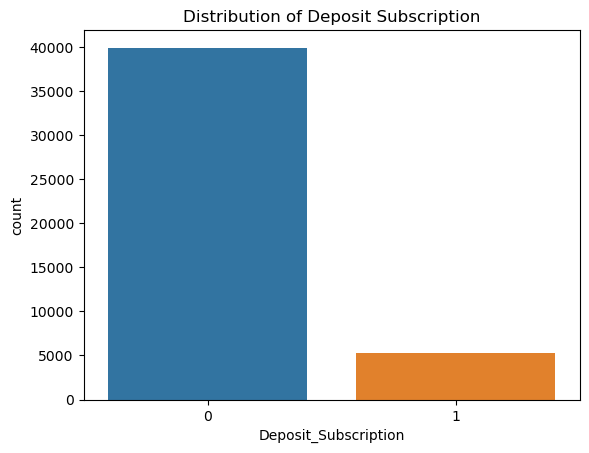

<Figure size 100x100 with 0 Axes>

In [48]:
# Distribution of the target variable

sns.countplot(x='Deposit_Subscription', data=df)
plt.title('Distribution of Deposit Subscription')
plt.figure(figsize=(1, 1))
plt.show()

#### Histogram for categorical variables

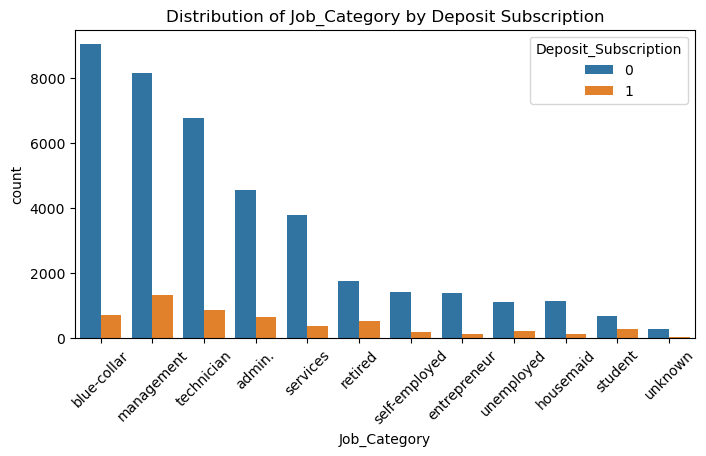

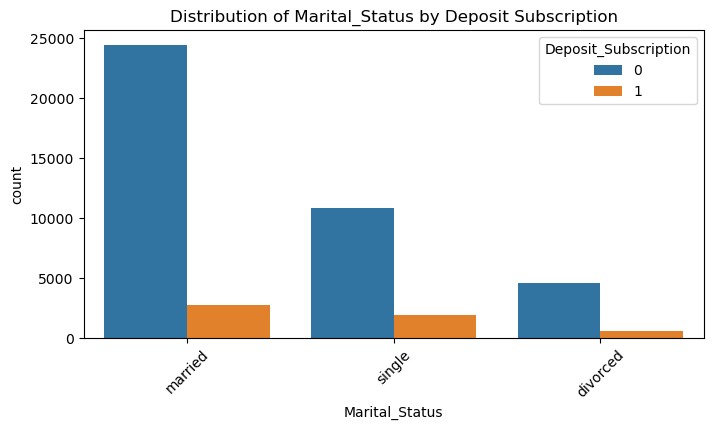

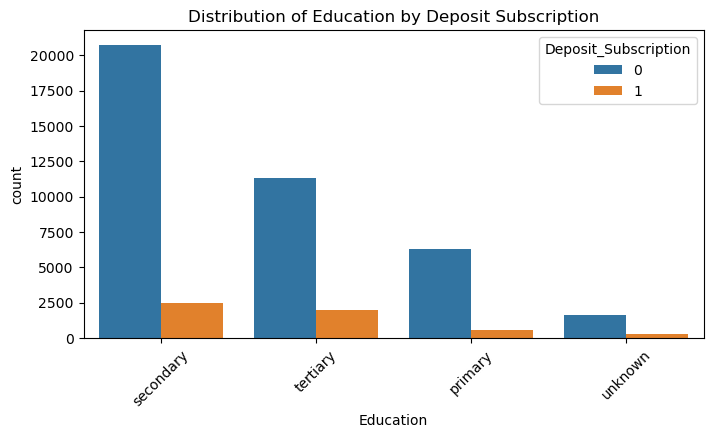

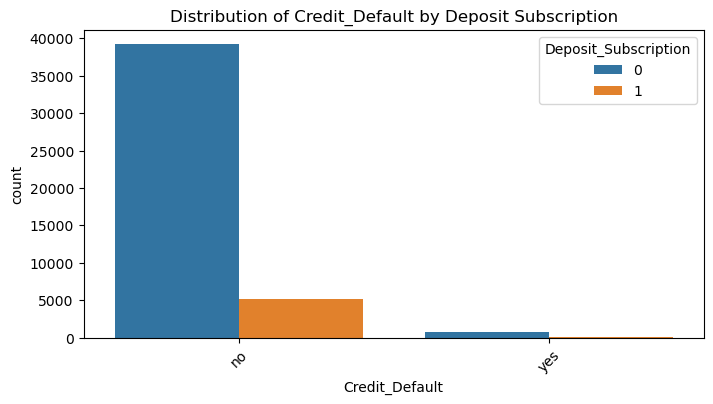

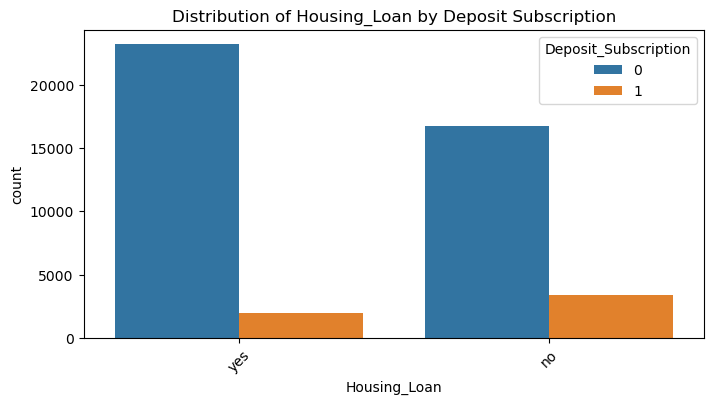

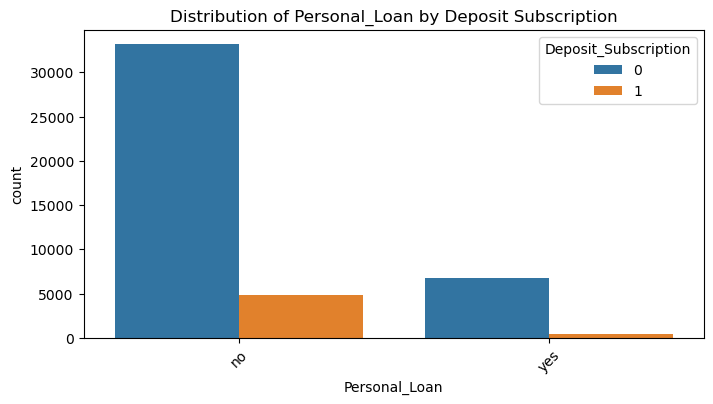

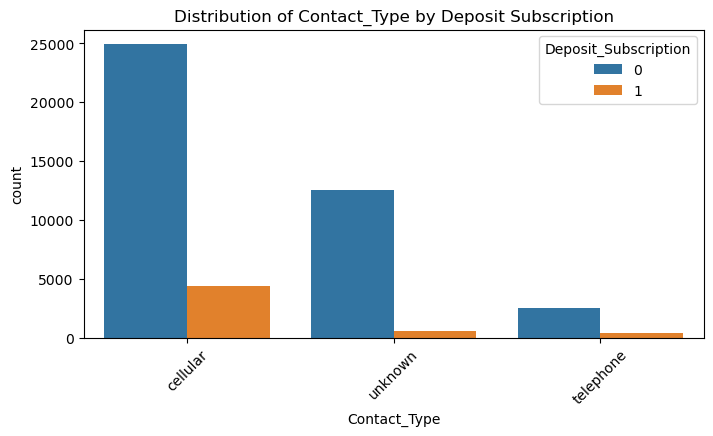

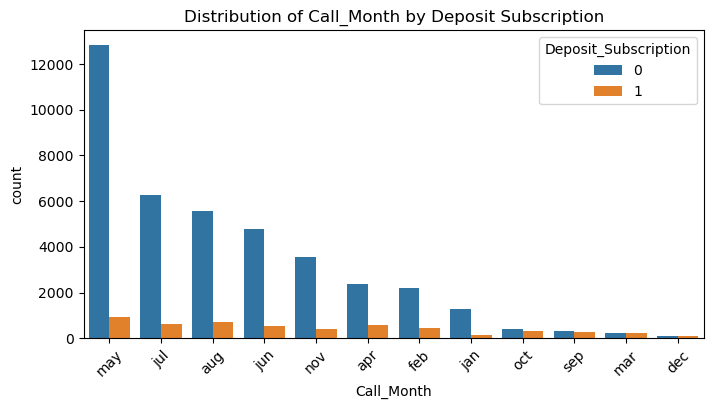

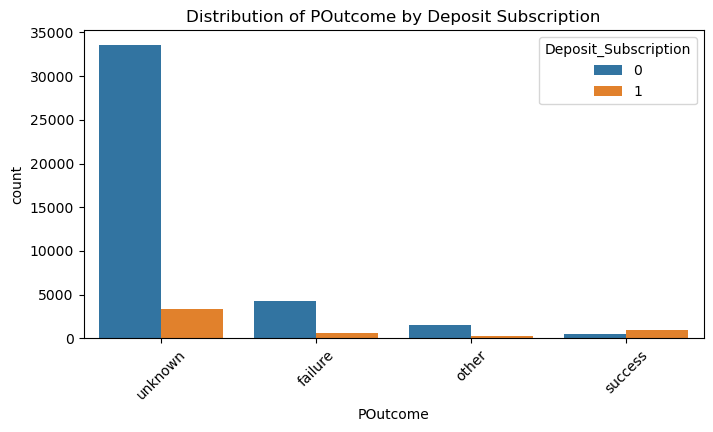

In [49]:
# Categorical features distribution

categorical_cols = ['Job_Category', 'Marital_Status', 'Education', 'Credit_Default', 'Housing_Loan', 'Personal_Loan', 'Contact_Type', 'Call_Month', 'POutcome']

for col in categorical_cols:
    # Get the sorted order based on count
    order = df[col].value_counts().index
    
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Deposit_Subscription', data=df, order=order)
    plt.title(f'Distribution of {col} by Deposit Subscription')
    plt.xticks(rotation=45)
    plt.show()


#### Stacked column chart for categorical variables

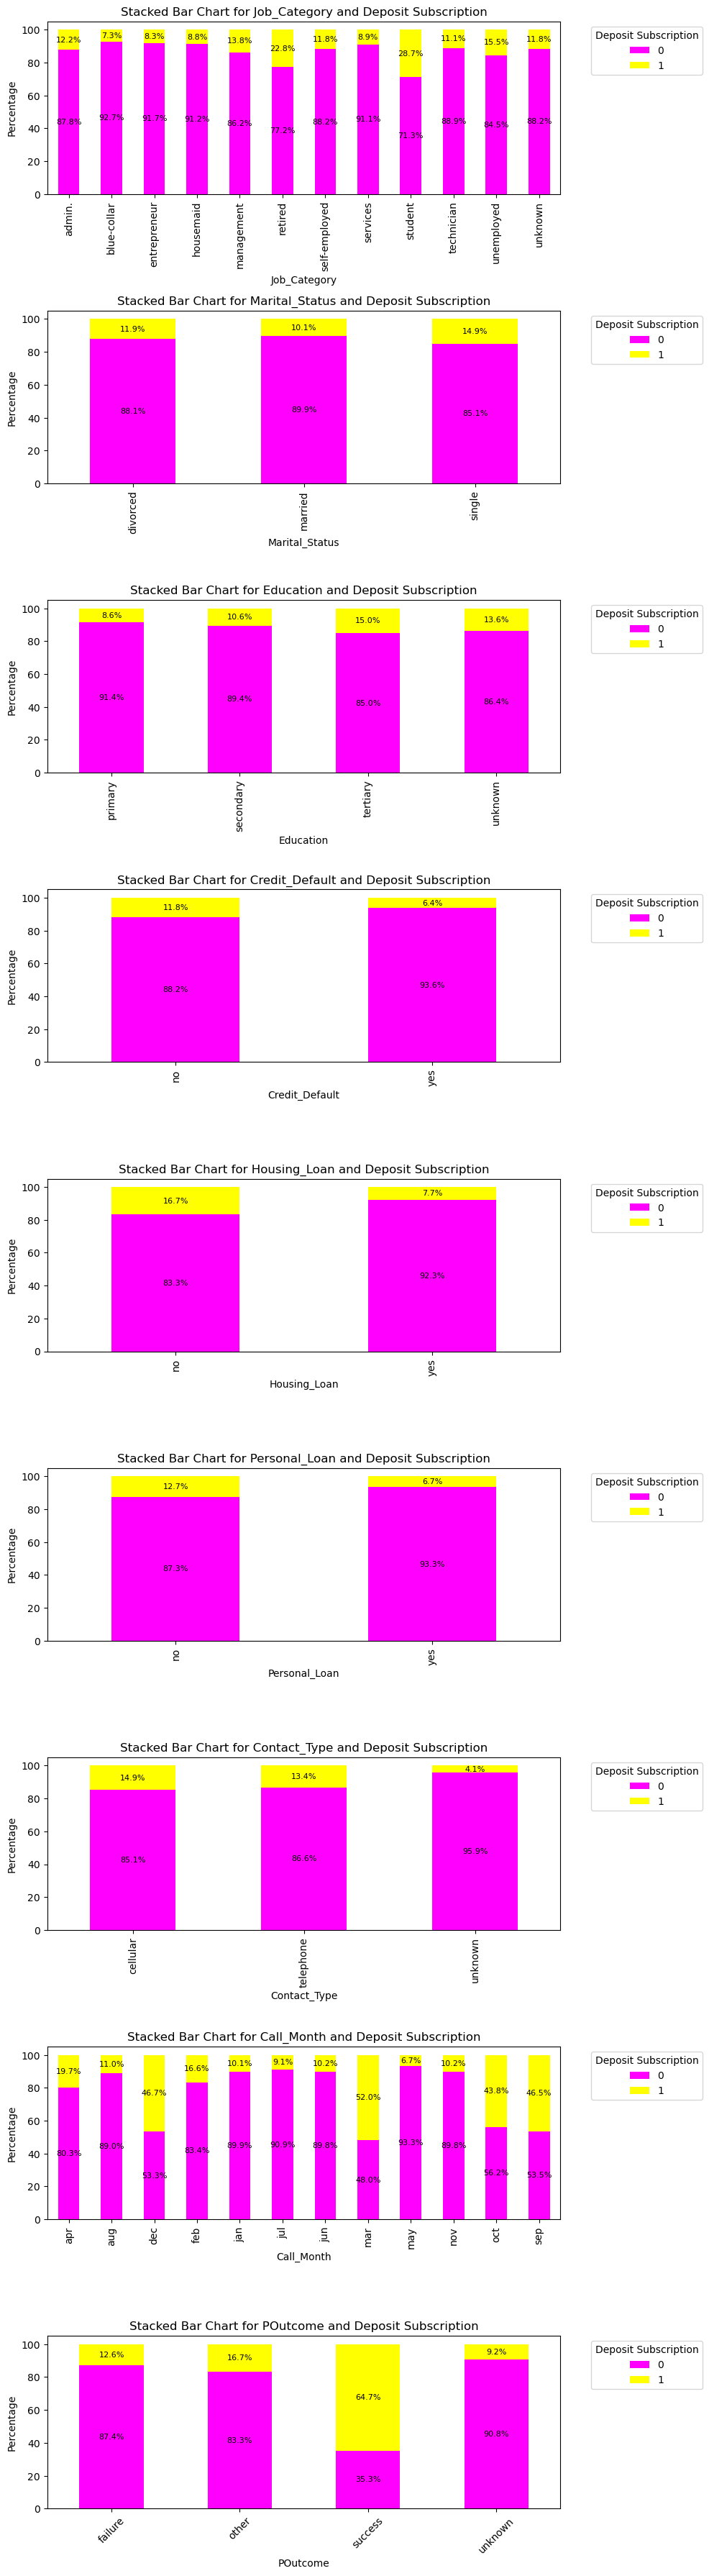

In [50]:
# Create subplots based on the number of categorical columns
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, 4 * len(categorical_cols)))

# Iterate over each categorical column
for i, category in enumerate(categorical_cols):
    # Create a DataFrame with the required information for each category
    category_subscription_df = df.groupby([category, 'Deposit_Subscription']).size().unstack()

    # Calculate the percentage for each category
    category_subscription_df_percentage = category_subscription_df.div(category_subscription_df.sum(axis=1), axis=0) * 100

    # Plot the stacked bar chart with text annotations
    ax = category_subscription_df_percentage.plot(kind='bar', stacked=True, colormap='spring', ax=axes[i])

    # Annotate each category with percentage values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()    
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='black', fontsize=8)

    ax.set_title(f'Stacked Bar Chart for {category} and Deposit Subscription')
    ax.set_xlabel(category)
    ax.set_ylabel('Percentage')
    ax.legend(title=f'Deposit Subscription', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### Patterns and Insights:

    - Students followed by retired followed by unemployed are more likely to open a deposit subscription account.
    - Single individuals are most likely to open a deposit subscription account.
    - Those with a higher education are more likely to open a deposit account.
    - Customers with credit default are less likely to open a deposit account compared with no credit default customers.
    - Customers with no housing loan are more likely to open a deposit account.
    - Customers with no personal loan are twice as likely to open a deposit account compared to customers with personal loan.
    - There is higher success rate when customers are contacted to their cell phone or telephone number.
    - There is more than 40% success rate in the months of March, December, September and October.
    - Customers with previous deposit account openings are more likely to open new accounts.
    
    

#### Boxplot for all numerical feautures to check the variables distribution

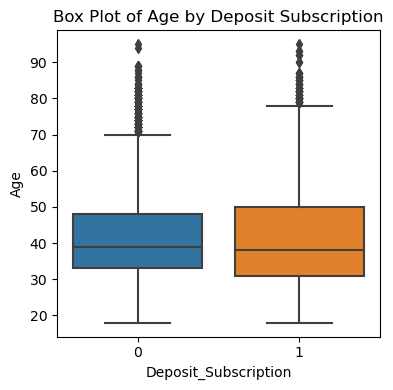

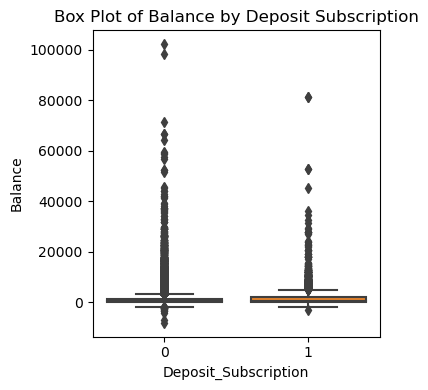

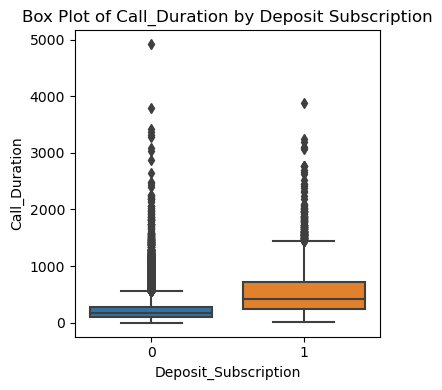

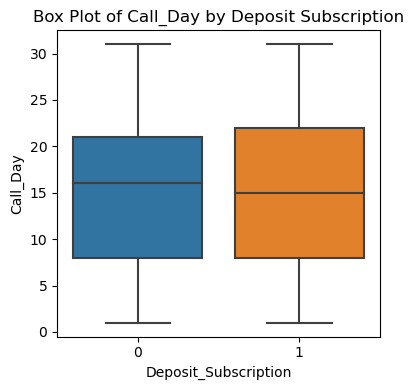

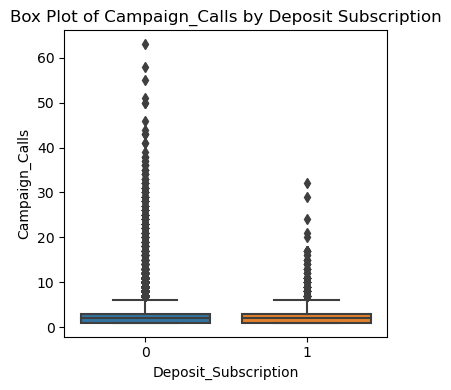

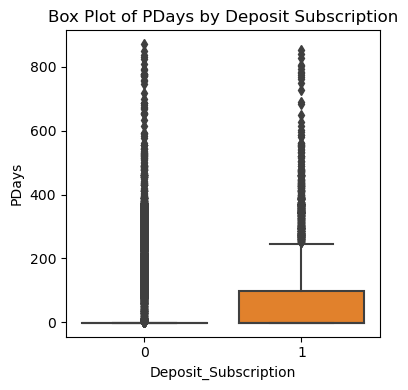

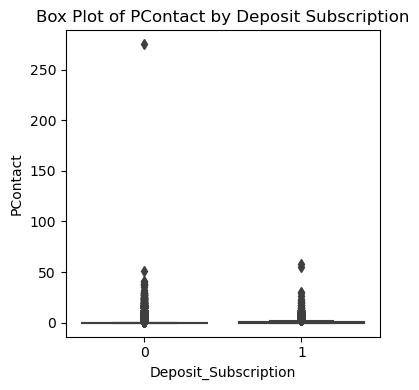

Original DataFrame shape: (45211, 17)
DataFrame without outliers shape: (28193, 17)


In [51]:
# Boxplot for outliers

numerical_cols = ['Age', 'Balance', 'Call_Duration', 'Call_Day', 'Campaign_Calls', 'PDays', 'PContact']

for col in numerical_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='Deposit_Subscription', y=col, data=df)
    plt.title(f'Box Plot of {col} by Deposit Subscription')
    plt.tight_layout()
    plt.show()
    

# Removing the outliers

# Calculate IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers based on IQR
outliers_mask = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Create a new DataFrame without outliers
df_no_outliers = df[~outliers_mask]

# Display original and new DataFrame shapes
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame without outliers shape: {df_no_outliers.shape}")

#### Numerical features Distribution

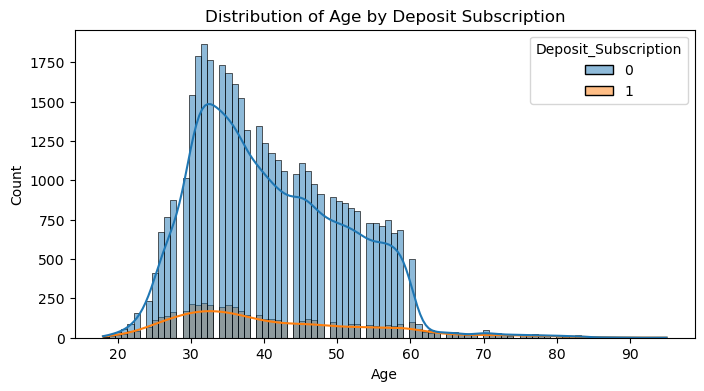

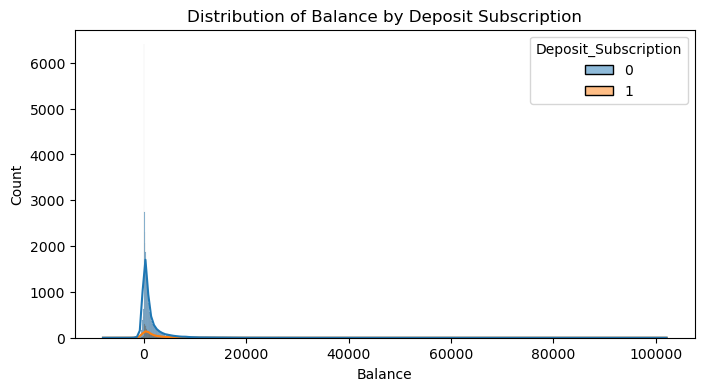

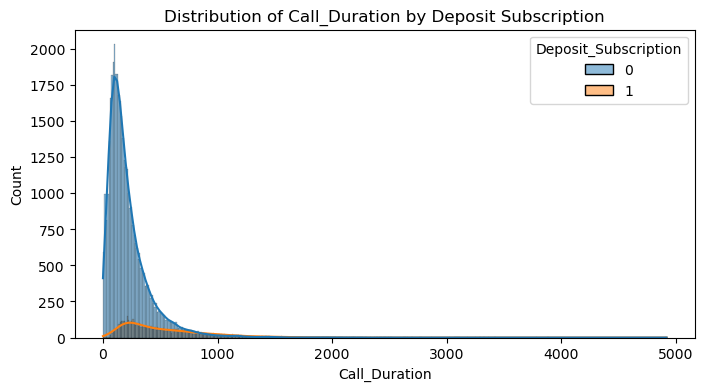

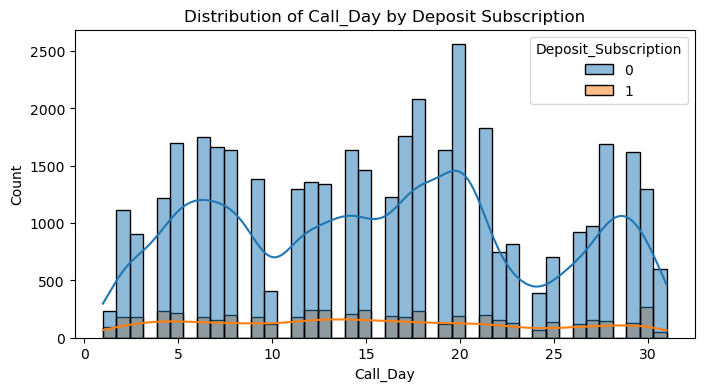

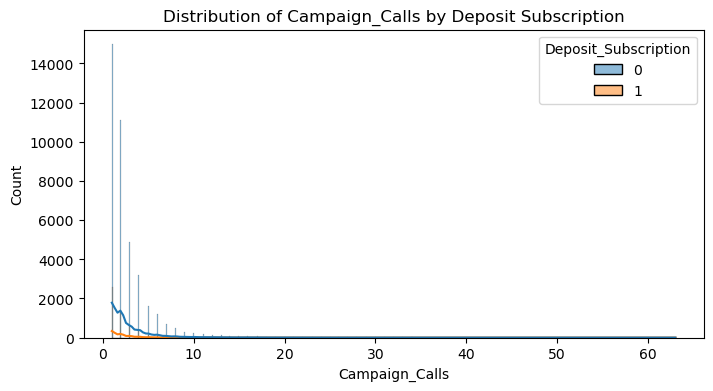

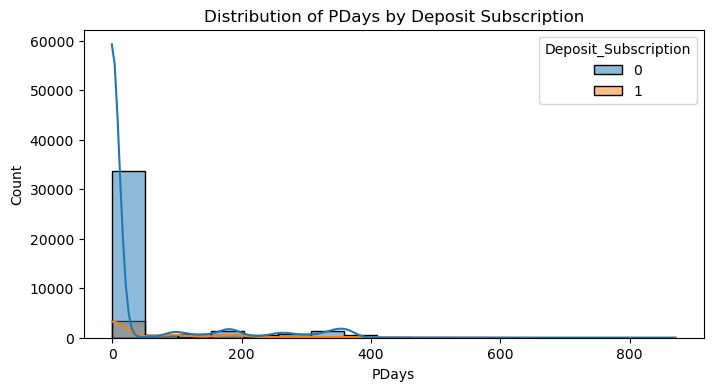

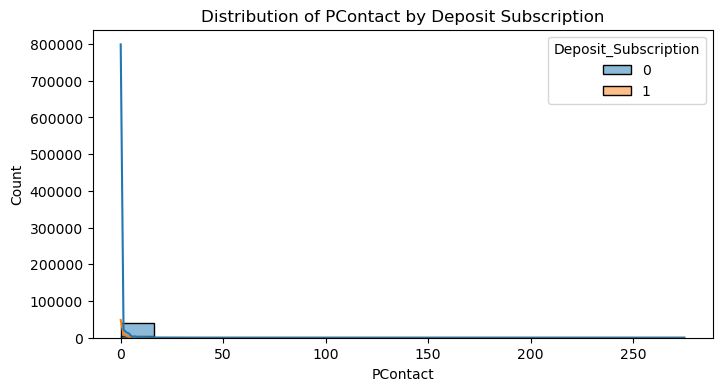

In [52]:
# Numerical features distribution

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df, x=col, kde=True, hue='Deposit_Subscription')
    plt.title(f'Distribution of {col} by Deposit Subscription')
    plt.show()

#### Patterns and Insights:

    - Students that are just entering college and/or getting jobs out of high school are more likely to open deposit accounts.
    - People over the age of 60 tend to open deposit accounts more.
    - People with almost no balance are more likely to open deposit accounts.
    - When call duration exceeds about 4 minutes, the probability of success decreases.
    - People who don’t subscribe in the previous contact are likely to subscribe if contacted a few more times.
    - As the number of contact days a customer was last contacted increases, the success probability decreases.

#### Correlation Matrix

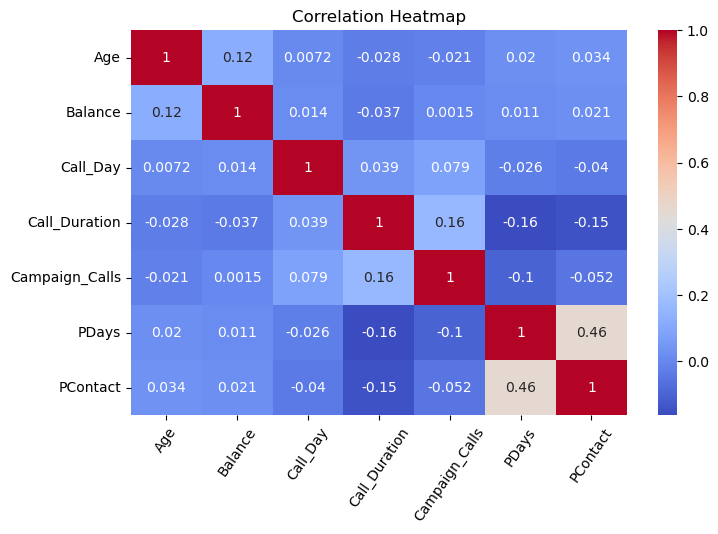

In [53]:
# Customers subscribed
subscribed_df = df[df['Deposit_Subscription'] == 1]

# Drop the 'Deposit_Subscription' column before creating the correlation matrix
df_without_target = subscribed_df.drop('Deposit_Subscription', axis=1)

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_without_target.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=55)
plt.show()


#### Pairplot

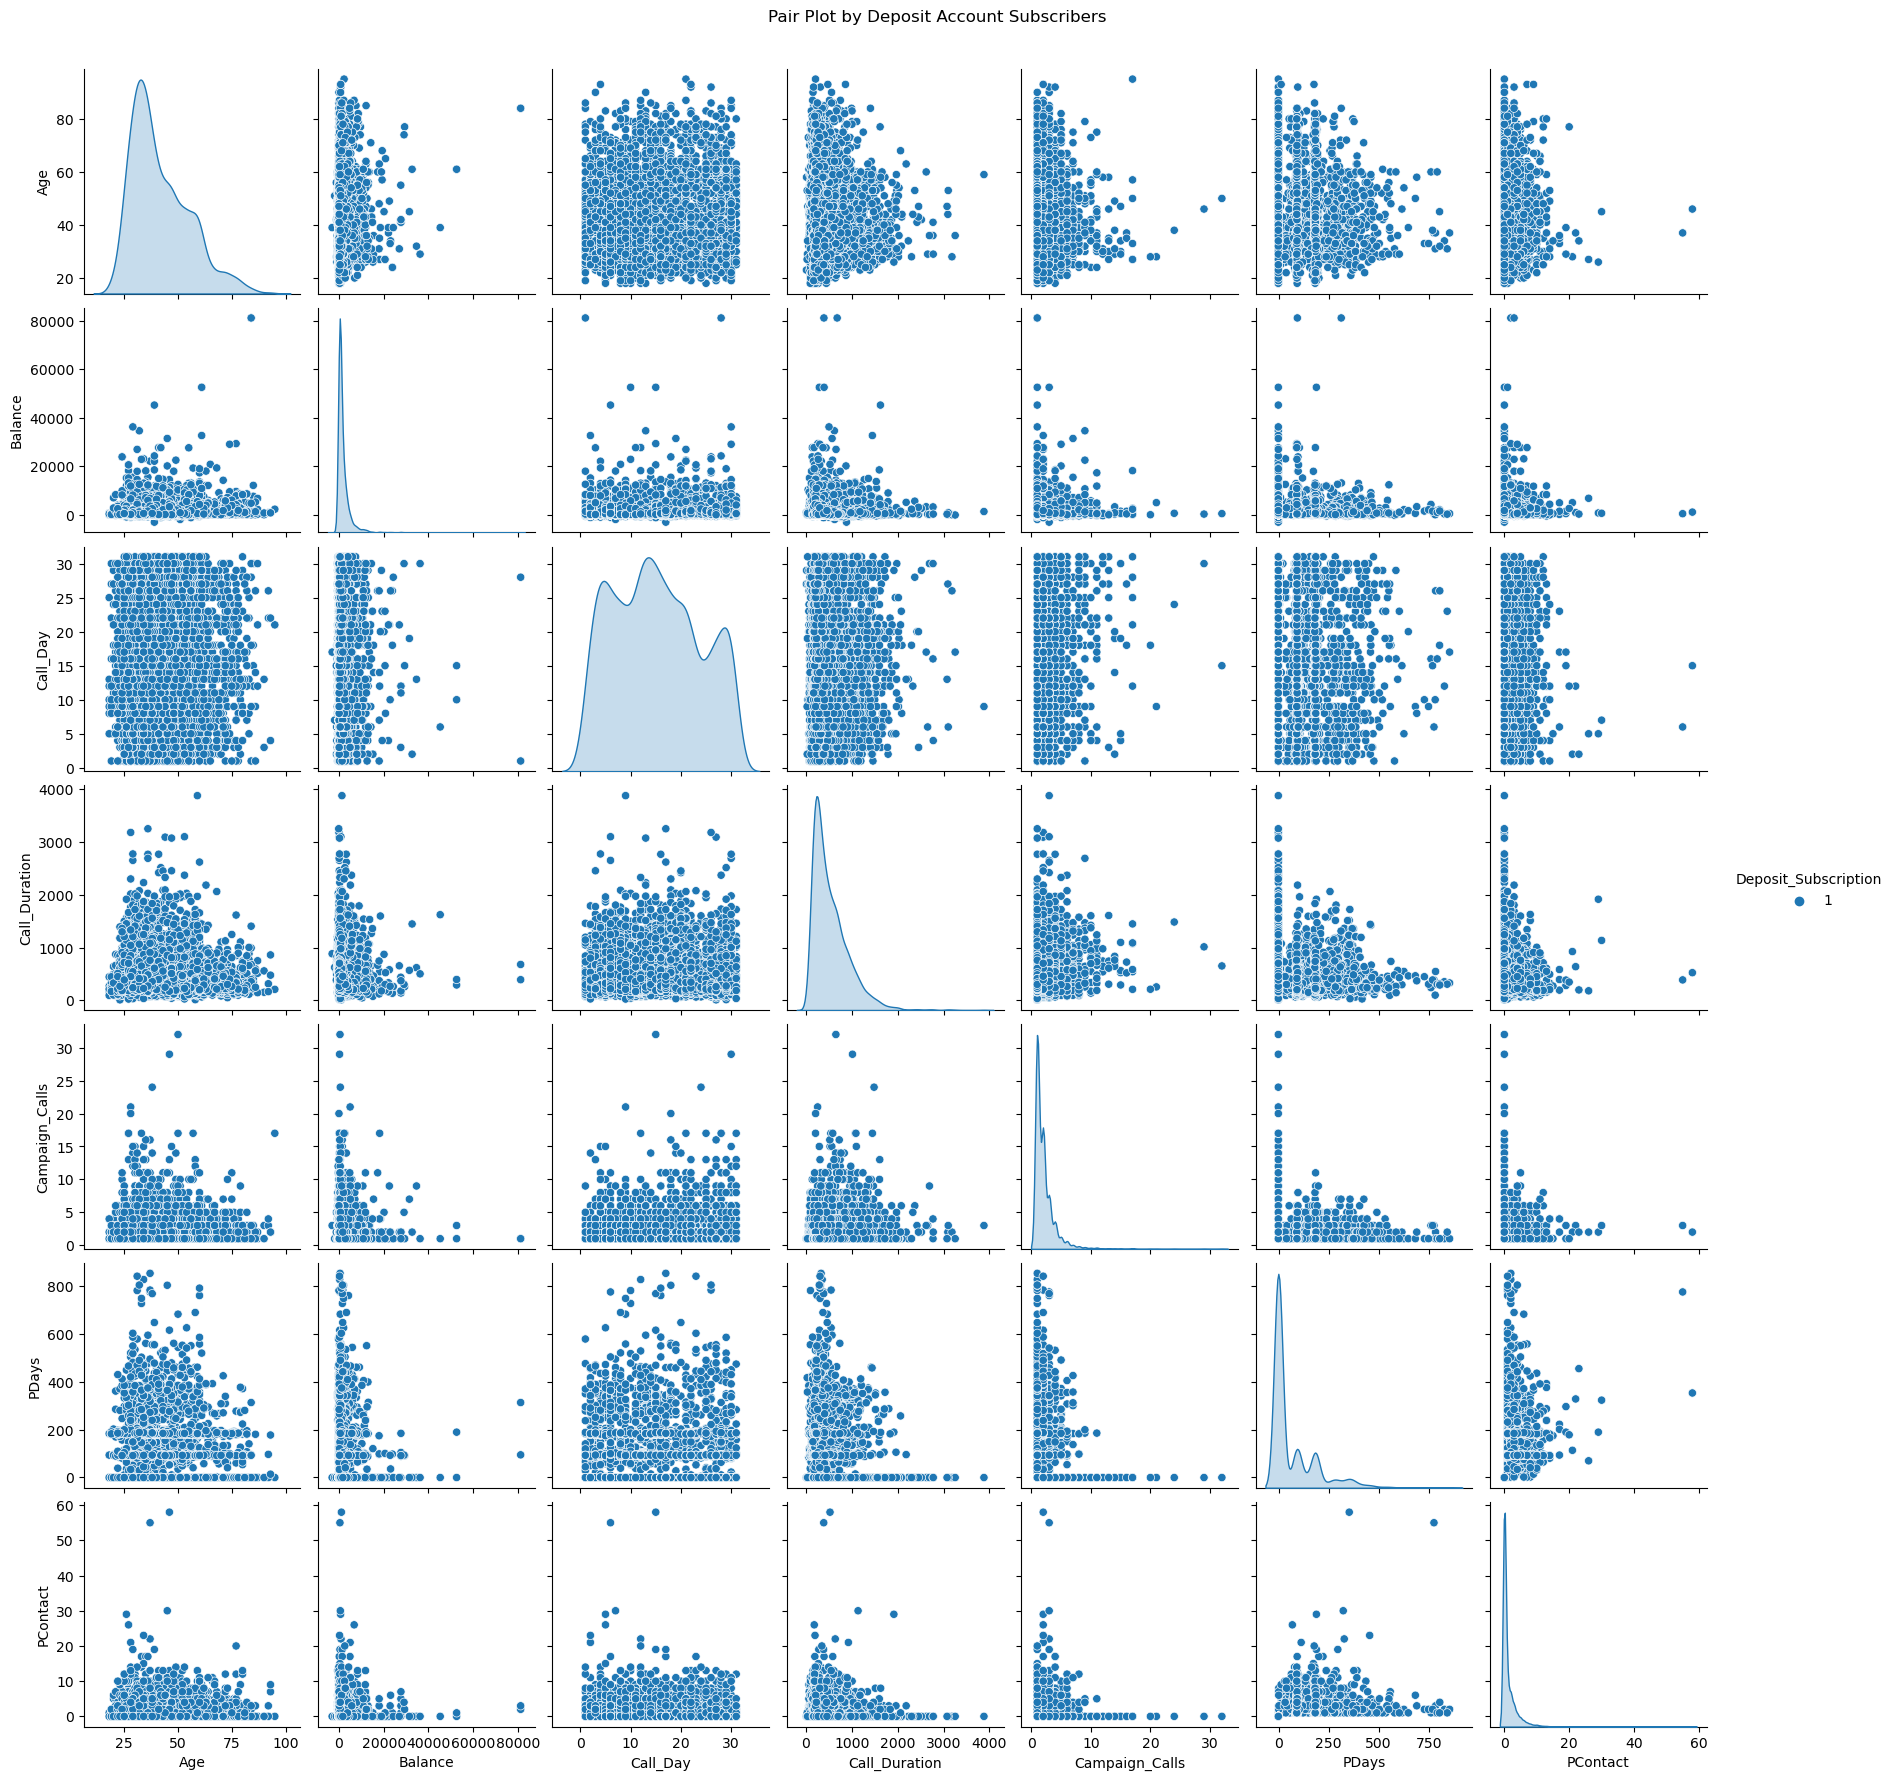

In [54]:
# Pairplot

sns.pairplot(subscribed_df, hue='Deposit_Subscription')
plt.suptitle('Pair Plot by Deposit Account Subscribers', y=1.02)
plt.show()

#### Logistic Regression Model

Intercept: -2.8529

Coefficients:
                       Feature  Coefficient
0                          Age     0.018008
1                      Balance     0.026886
2                     Call_Day     0.079410
3                Call_Duration     1.087097
4               Campaign_Calls    -0.283813
5                        PDays     0.006637
6                     PContact     0.017494
7     Job_Category_blue-collar    -0.118095
8    Job_Category_entrepreneur    -0.057664
9       Job_Category_housemaid    -0.069346
10     Job_Category_management    -0.066590
11        Job_Category_retired     0.044579
12  Job_Category_self-employed    -0.052375
13       Job_Category_services    -0.070462
14        Job_Category_student     0.043436
15     Job_Category_technician    -0.088897
16     Job_Category_unemployed    -0.024628
17        Job_Category_unknown    -0.037397
18      Marital_Status_married    -0.089692
19       Marital_Status_single     0.057359
20         Education_secondary     0.12445

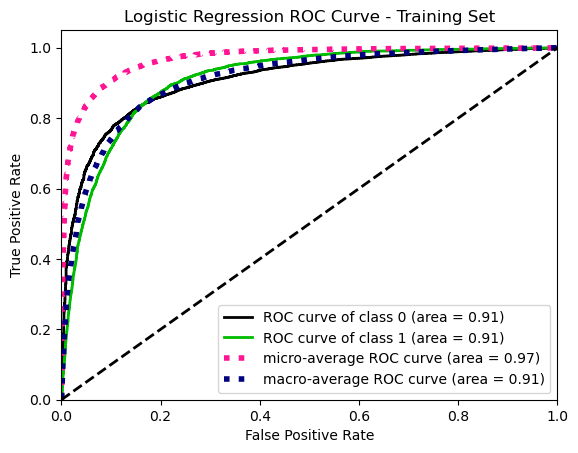


---------------------------

Testing Set:

Confusion Matrix: 
 [[11657   309]
 [ 1048   550]]

Accuracy: 0.90
Recall Score: 0.34
Precision Score: 0.64
AUC-ROC Curve Value: 0.91


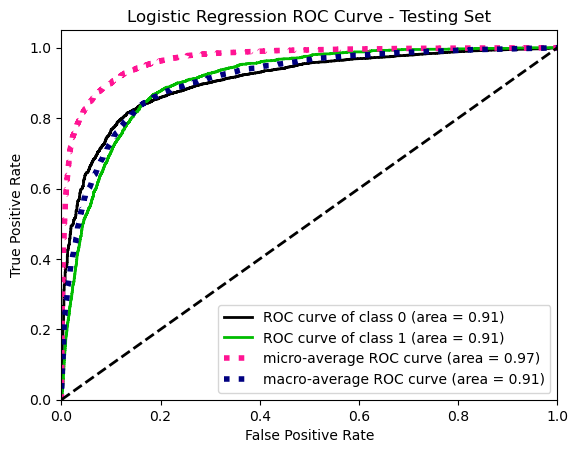

In [56]:
# Model 1A: Logistic Regression Model

# Define features (X) and target variable (y)
X = df.drop('Deposit_Subscription', axis=1)
y = df['Deposit_Subscription']

# Encode categorical variables (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Standardize the features (optional, but often beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = logreg_model.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = logreg_model.predict(X_test_scaled)

# Get the coefficients and intercept
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# Get the feature names
feature_names = X_encoded.columns

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the intercept
print(f'Intercept: {intercept:.4f}')

# Display the coefficients
print("\nCoefficients:")
print(coefficients_df)

# Evaluate the model on the training set
print("\nTraining Set:")
print('\nConfusion Matrix: \n', confusion_matrix(y_train, y_train_pred))
print(f'\nAccuracy: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Recall Score: {recall_score(y_train, y_train_pred):.2f}')
print(f'Precision Score: {precision_score(y_train, y_train_pred):.2f}')

# Logistic Regression ROC Curve - Training Set
print(f'AUC-ROC Curve Value: {roc_auc_score(y_train, logreg_model.predict_proba(X_train_scaled)[:, 1]):.2f}')
skplt.metrics.plot_roc(y_train, logreg_model.predict_proba(X_train_scaled))
plt.title('Logistic Regression ROC Curve - Training Set')
plt.show()

print("\n---------------------------\n")

# Evaluate the model on the test set
print("Testing Set:")
print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_test_pred))
print(f'\nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}')
print(f'Recall Score: {recall_score(y_test, y_test_pred):.2f}')
print(f'Precision Score: {precision_score(y_test, y_test_pred):.2f}')

# Logistic Regression ROC Curve - Testing Set
print(f'AUC-ROC Curve Value: {roc_auc_score(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1]):.2f}')
skplt.metrics.plot_roc(y_test, logreg_model.predict_proba(X_test_scaled))
plt.title('Logistic Regression ROC Curve - Testing Set')
plt.show()


#### Logistic Regression Model with no outliers

Intercept: -4.0043

Coefficients:
                       Feature  Coefficient
0                          Age    -0.056969
1                      Balance     0.128830
2                     Call_Day    -0.002294
3                Call_Duration     1.016354
4               Campaign_Calls    -0.254810
5                        PDays     0.000000
6                     PContact     0.000000
7     Job_Category_blue-collar    -0.126511
8    Job_Category_entrepreneur    -0.070465
9       Job_Category_housemaid    -0.063988
10     Job_Category_management    -0.053815
11        Job_Category_retired     0.044089
12  Job_Category_self-employed    -0.065353
13       Job_Category_services    -0.089723
14        Job_Category_student     0.075226
15     Job_Category_technician    -0.067728
16     Job_Category_unemployed    -0.016010
17        Job_Category_unknown    -0.041718
18      Marital_Status_married    -0.194489
19       Marital_Status_single    -0.101676
20         Education_secondary     0.14660

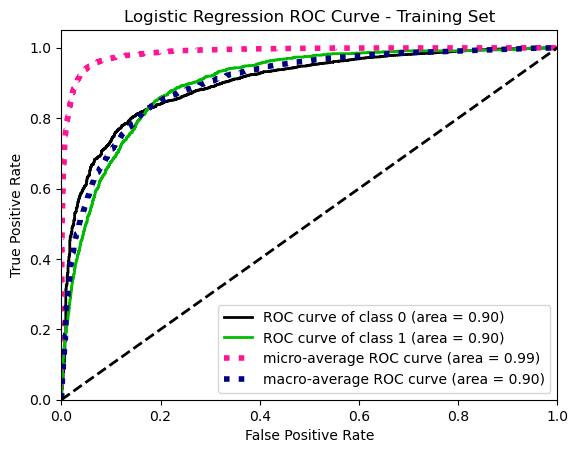


---------------------------

Testing Set:

Confusion Matrix: 
 [[7915   71]
 [ 390   82]]

Accuracy: 0.95
Recall Score: 0.17
Precision Score: 0.54
AUC-ROC Curve Value: 0.91


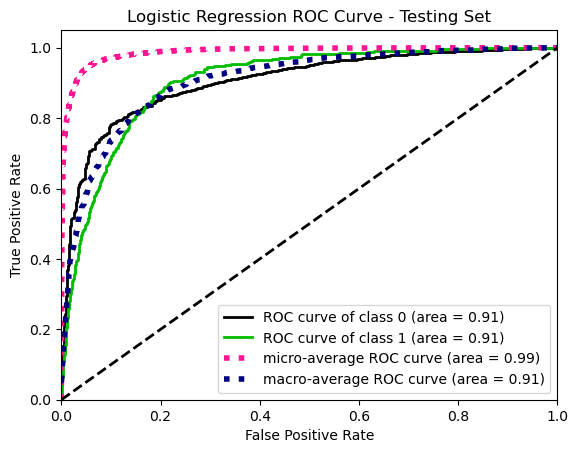

In [8]:
# Model 1B: Logistic Regression Model with no outliers

# Define features (X) and target variable (y)
X_new = df_no_outliers.drop('Deposit_Subscription', axis=1)
y_new = df_no_outliers['Deposit_Subscription']

# Encode categorical variables (one-hot encoding)
X_new_encoded = pd.get_dummies(X_new, drop_first=True)

# Split the dataset into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_encoded, y_new, test_size=0.3, random_state=42)

# Standardize the features (optional, but often beneficial for logistic regression)
scaler = StandardScaler()
X_new_train_scaled = scaler.fit_transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_new_train_scaled, y_new_train)

# Make predictions on the training set
y_new_train_pred = logreg_model.predict(X_new_train_scaled)

# Make predictions on the test set
y_new_test_pred = logreg_model.predict(X_new_test_scaled)

# Get the coefficients and intercept
new_coefficients = logreg_model.coef_[0]
new_intercept = logreg_model.intercept_[0]

# Get the feature names
feature_names = X_new_encoded.columns

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': new_coefficients})

# Display the intercept
print(f'Intercept: {new_intercept:.4f}')

# Display the coefficients
print("\nCoefficients:")
print(coefficients_df)

# Evaluate the model on the training set
print("\nTraining Set:")
print('\nConfusion Matrix: \n', confusion_matrix(y_new_train, y_new_train_pred))
print(f'\nAccuracy: {accuracy_score(y_new_train, y_new_train_pred):.2f}')
print(f'Recall Score: {recall_score(y_new_train, y_new_train_pred):.2f}')
print(f'Precision Score: {precision_score(y_new_train, y_new_train_pred):.2f}')

# Logistic Regression ROC Curve - Training Set
print(f'AUC-ROC Curve Value: {roc_auc_score(y_new_train, logreg_model.predict_proba(X_new_train_scaled)[:, 1]):.2f}')
skplt.metrics.plot_roc(y_new_train, logreg_model.predict_proba(X_new_train_scaled))
plt.title('Logistic Regression ROC Curve - Training Set')
plt.show()

print("\n---------------------------\n")

# Evaluate the model on the test set
print("Testing Set:")
print('\nConfusion Matrix: \n', confusion_matrix(y_new_test, y_new_test_pred))
print(f'\nAccuracy: {accuracy_score(y_new_test, y_new_test_pred):.2f}')
print(f'Recall Score: {recall_score(y_new_test, y_new_test_pred):.2f}')
print(f'Precision Score: {precision_score(y_new_test, y_new_test_pred):.2f}')

# Logistic Regression ROC Curve - Testing Set
print(f'AUC-ROC Curve Value: {roc_auc_score(y_new_test, logreg_model.predict_proba(X_new_test_scaled)[:, 1]):.2f}')
skplt.metrics.plot_roc(y_new_test, logreg_model.predict_proba(X_new_test_scaled))
plt.title('Logistic Regression ROC Curve - Testing Set')
plt.show()


#### Decision tree with maximum depth of 4

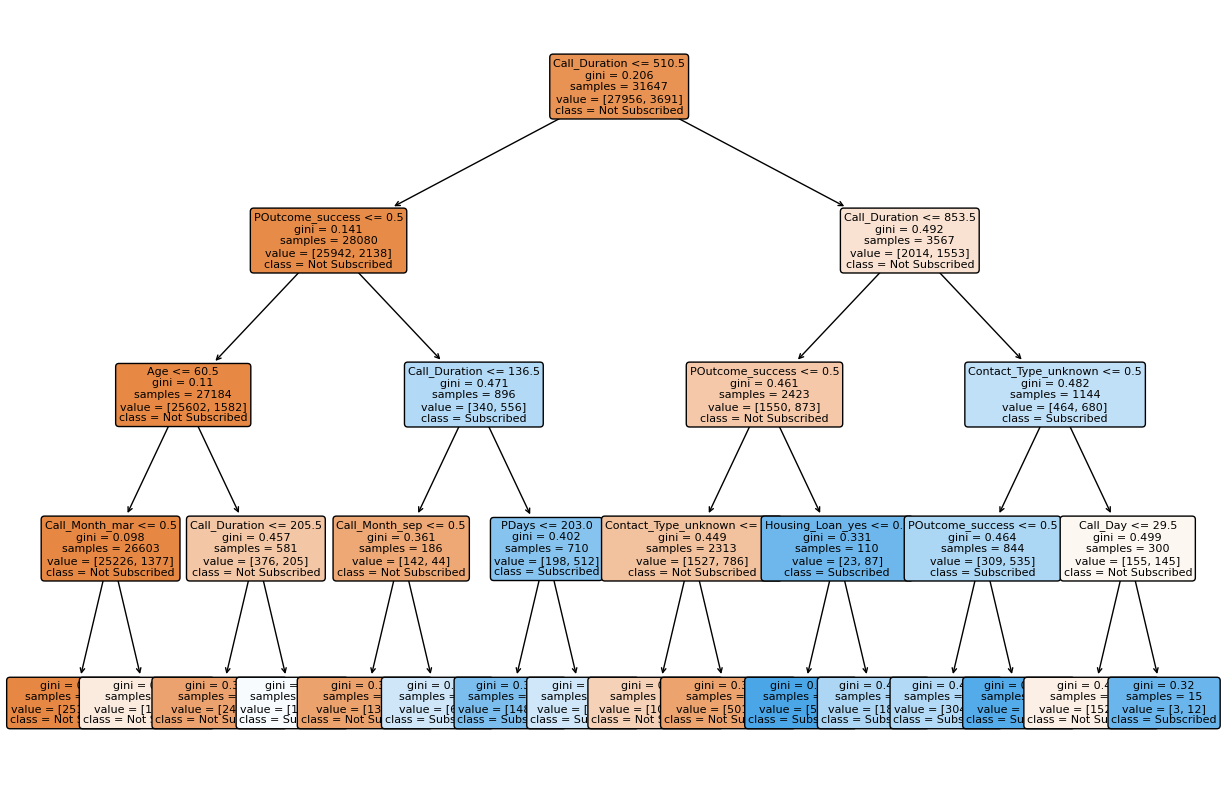

Training Set:
Accuracy: 0.90

Confusion Matrix:
[[27285   671]
 [ 2398  1293]]


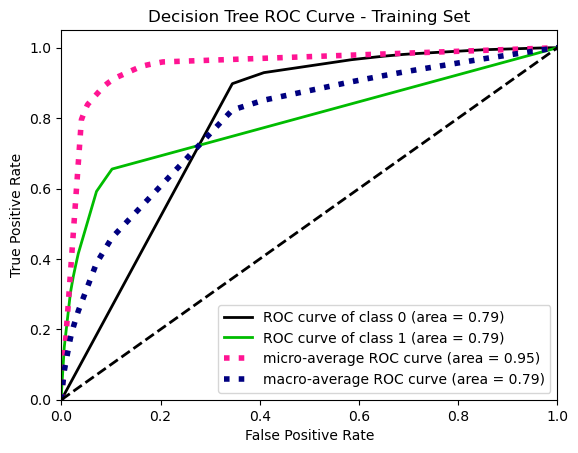


---------------------------

Testing Set:
Accuracy: 0.90

Confusion Matrix:
[[11657   309]
 [ 1048   550]]


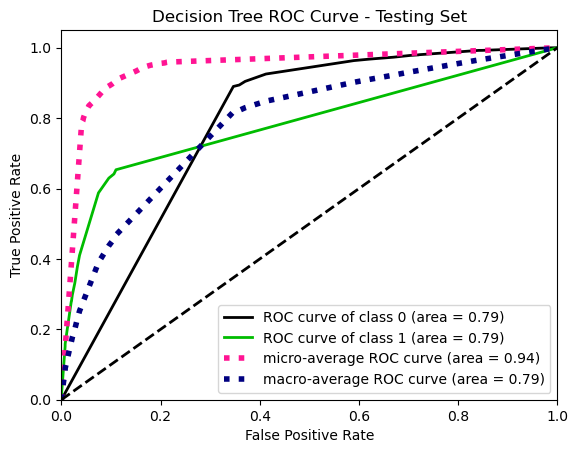

In [57]:
# Model 2: Decision tree

# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the training set
y_dt_train_pred = dt_model.predict(X_train)

# Make predictions on the test set
y_dt_test_pred = dt_model.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_encoded.columns, class_names=['Not Subscribed', 'Subscribed'], rounded=True, fontsize=8)
plt.show()

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


# Display results
print("Training Set:")
print(f"Accuracy: {accuracy_train:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)


# Decision Tree ROC Curve - Training Set
skplt.metrics.plot_roc(y_train, dt_model.predict_proba(X_train))
plt.title('Decision Tree ROC Curve - Training Set')
plt.show()

print("\n---------------------------\n")

print("Testing Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_test)


# Decision Tree ROC Curve - Testing Set
skplt.metrics.plot_roc(y_test, dt_model.predict_proba(X_test))
plt.title('Decision Tree ROC Curve - Testing Set')
plt.show()

#### Decision Tree with maximum depth of 4 and no outliers

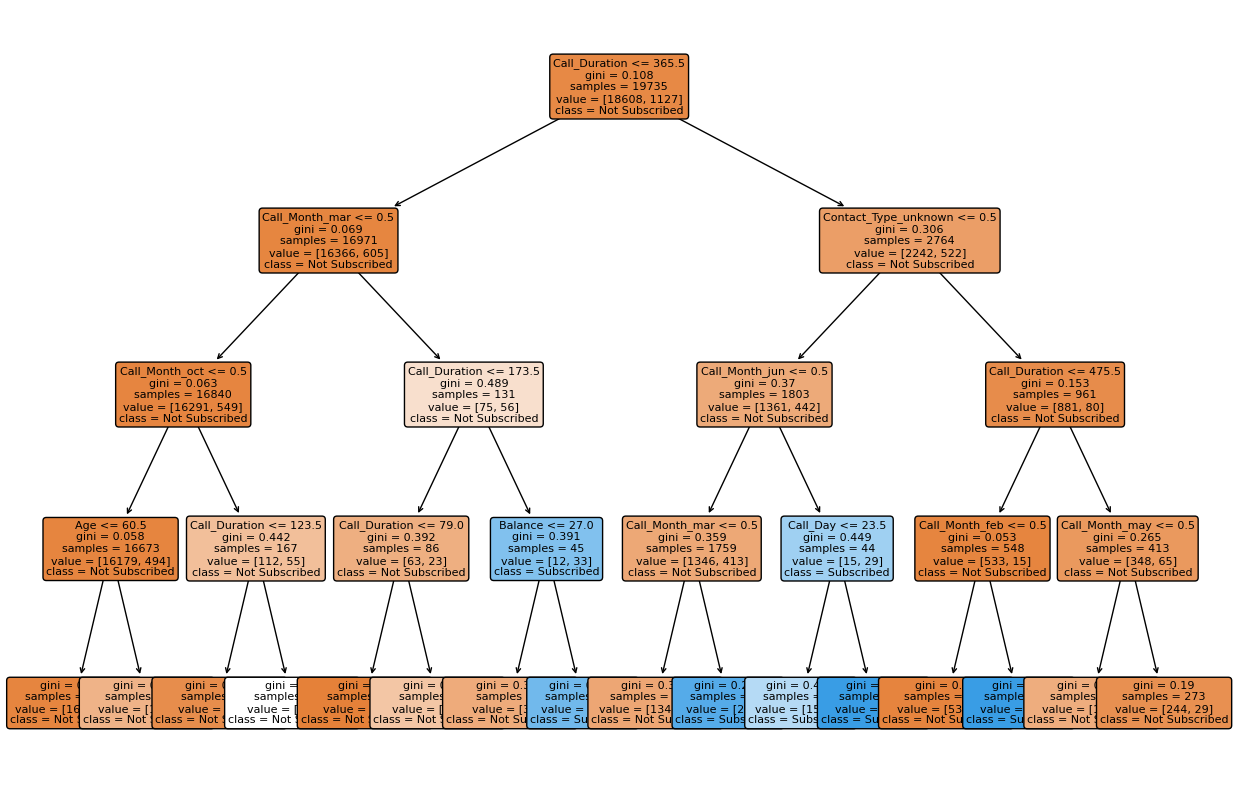


Training Set:

Confusion Matrix: 
 [[18582    26]
 [ 1051    76]]

Accuracy: 0.95
Recall Score: 0.07
Precision Score: 0.75


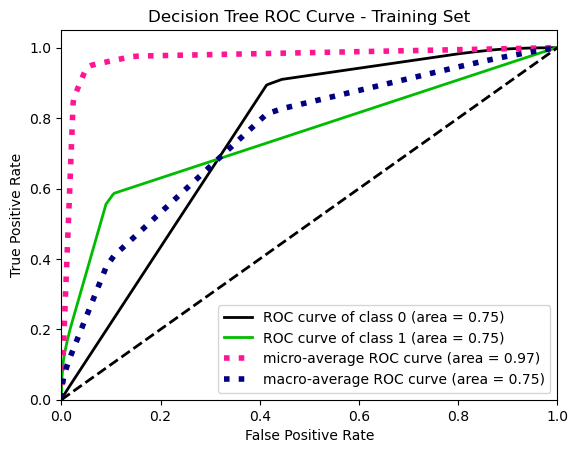


---------------------------

Testing Set:

Confusion Matrix: 
 [[7974   12]
 [ 430   42]]

Accuracy: 0.95
Recall Score: 0.09
Precision Score: 0.78


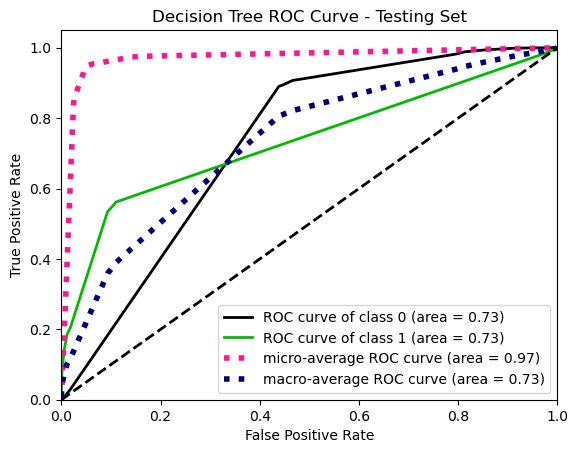

In [58]:
# Model 2B: Decision tree

# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Train the model on the training set
dt_model.fit(X_new_train, y_new_train)

# Make predictions on the training set
y_dt_train_pred = dt_model.predict(X_new_train)

# Make predictions on the test set
y_dt_test_pred = dt_model.predict(X_new_test)

# A list of your feature column names
feature_names = X_train.columns.tolist()

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_new_encoded.columns, class_names=['Not Subscribed', 'Subscribed'], rounded=True, fontsize=8)
plt.show()

# Evaluate the model on the training set
print("\nTraining Set:")
print('\nConfusion Matrix: \n', confusion_matrix(y_new_train, y_dt_train_pred))
print(f'\nAccuracy: {accuracy_score(y_new_train, y_dt_train_pred):.2f}')
print(f'Recall Score: {recall_score(y_new_train, y_dt_train_pred):.2f}')
print(f'Precision Score: {precision_score(y_new_train, y_dt_train_pred):.2f}')

# Decision Tree ROC Curve - Training Set
skplt.metrics.plot_roc(y_new_train, dt_model.predict_proba(X_new_train))
plt.title('Decision Tree ROC Curve - Training Set')
plt.show()

print("\n---------------------------\n")

# Evaluate the model on the test set
print("Testing Set:")
print('\nConfusion Matrix: \n', confusion_matrix(y_new_test, y_dt_test_pred))
print(f'\nAccuracy: {accuracy_score(y_new_test, y_dt_test_pred):.2f}')
print(f'Recall Score: {recall_score(y_new_test, y_dt_test_pred):.2f}')
print(f'Precision Score: {precision_score(y_new_test, y_dt_test_pred):.2f}')

# Decision Tree ROC Curve - Testing Set
skplt.metrics.plot_roc(y_new_test, dt_model.predict_proba(X_new_test))
plt.title('Decision Tree ROC Curve - Testing Set')
plt.show()


#### Random Forest with optimum number of estimators = 130

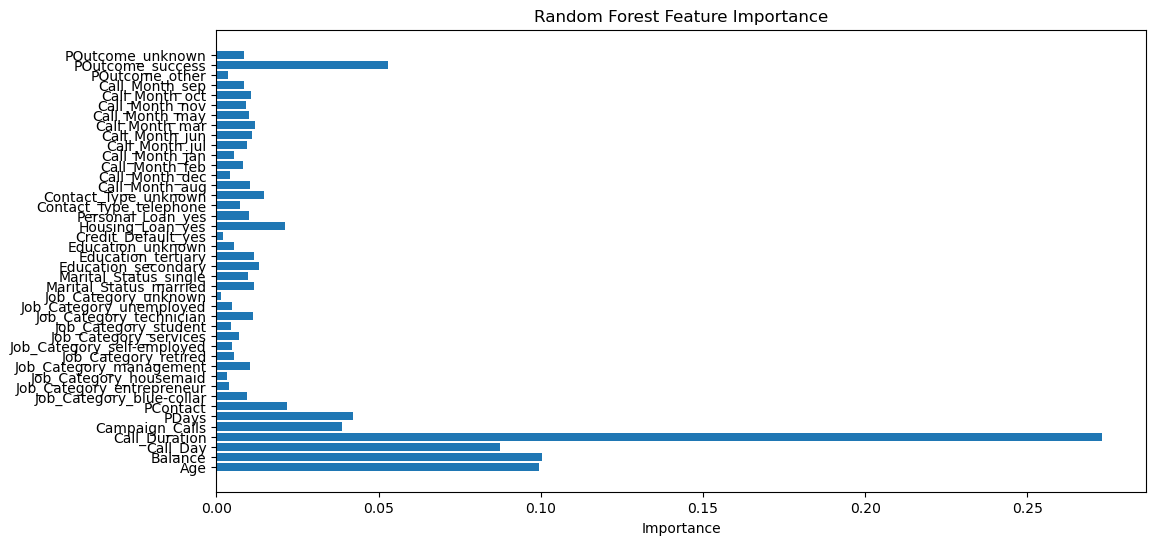

Training Set Metrics:

Confusion Matrix:
[[27956     0]
 [    0  3691]]

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


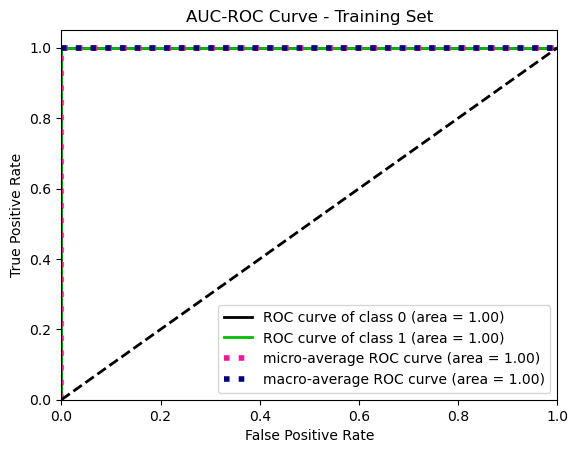


Test Set Metrics:

Confusion Matrix:
[[11655   311]
 [  951   647]]

Accuracy: 0.91
Precision: 0.68
Recall: 0.40


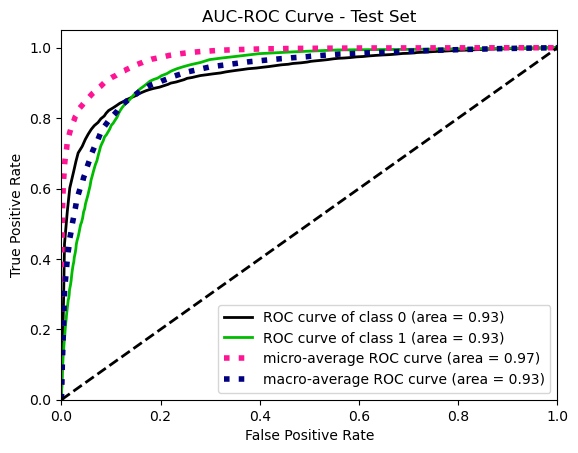

In [59]:
# Model 3: Random Forest

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=130)

# Train the model on the training set
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Evaluate the model on the training set
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf)
recall_score_train_rf = recall_score(y_train, y_train_pred_rf)

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_score_test_rf = recall_score(y_test, y_test_pred_rf)

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
feature_names = X_encoded.columns

plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importances)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()

# Display results for training set
print("Training Set Metrics:")
print(f"\nConfusion Matrix:\n{conf_matrix_train_rf}\n")
print(f"Accuracy: {accuracy_train_rf:.2f}")
print(f"Precision: {precision_train_rf:.2f}")
print(f"Recall: {recall_score_train_rf:.2f}")

# AUC-ROC Curve for Training Set
skplt.metrics.plot_roc(y_train, rf_model.predict_proba(X_train_scaled))
plt.title('AUC-ROC Curve - Training Set')
plt.show()

# Display results for test set
print("\nTest Set Metrics:")
print(f"\nConfusion Matrix:\n{conf_matrix_test_rf}\n")
print(f"Accuracy: {accuracy_test_rf:.2f}")
print(f"Precision: {precision_test_rf:.2f}")
print(f"Recall: {recall_score_test_rf:.2f}")

# AUC-ROC Curve for Test Set
skplt.metrics.plot_roc(y_test, rf_model.predict_proba(X_test_scaled))
plt.title('AUC-ROC Curve - Test Set')
plt.show()


#### Random Forest (no outliers) with optimum number of estimators = 130

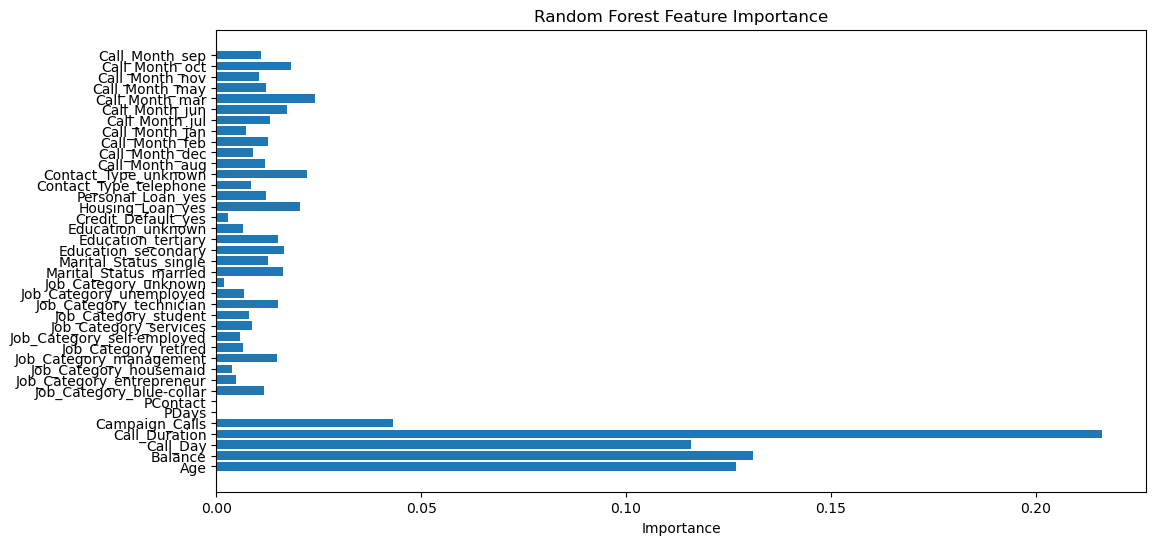

Training Set Metrics:

Confusion Matrix:
[[18608     0]
 [    0  1127]]

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


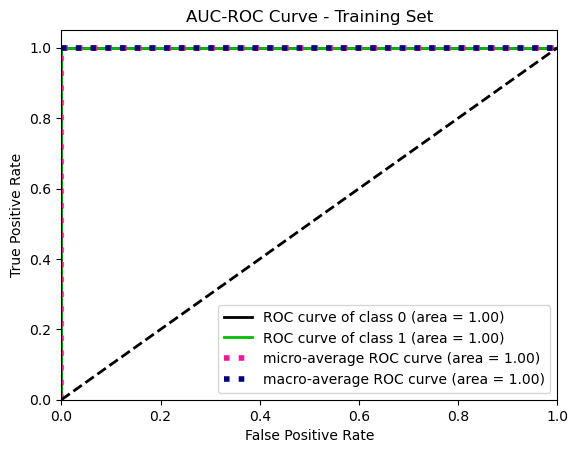


Test Set Metrics:

Confusion Matrix:
[[7952   34]
 [ 397   75]]

Accuracy: 0.95
Precision: 0.69
Recall: 0.16


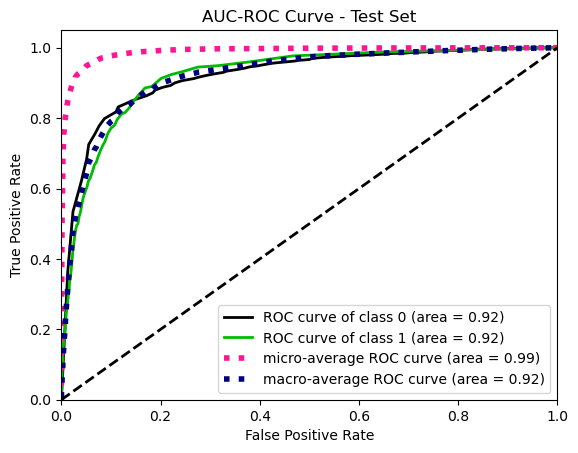

In [41]:
# Model 3B: Random Forest with no outliers

# Standardize the features 
scaler = StandardScaler()
X_new_train_scaled = scaler.fit_transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

# Create a Random Forest classifier
rf_new_model = RandomForestClassifier(random_state=42, n_estimators=130)

# Train the model on the training set
rf_new_model.fit(X_new_train_scaled, y_new_train)

# Make predictions on the training set
y_new_train_pred_rf = rf_new_model.predict(X_new_train_scaled)

# Evaluate the model on the training set
new_accuracy_train_rf = accuracy_score(y_new_train, y_new_train_pred_rf)
new_conf_matrix_train_rf = confusion_matrix(y_new_train, y_new_train_pred_rf)
new_precision_train_rf = precision_score(y_new_train, y_new_train_pred_rf)
new_recall_score_train_rf = recall_score(y_new_train, y_new_train_pred_rf)

# Make predictions on the test set
y_new_test_pred_rf = rf_new_model.predict(X_new_test_scaled)

# Evaluate the model on the test set
new_accuracy_test_rf = accuracy_score(y_new_test, y_new_test_pred_rf)
new_conf_matrix_test_rf = confusion_matrix(y_new_test, y_new_test_pred_rf)
new_precision_test_rf = precision_score(y_new_test, y_new_test_pred_rf)
new_recall_score_test_rf = recall_score(y_new_test, y_new_test_pred_rf)

# Feature Importance Plot
new_feature_importances = rf_new_model.feature_importances_
new_feature_names = X_new_encoded.columns

plt.figure(figsize=(12, 6))
plt.barh(new_feature_names, new_feature_importances)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()

# Display results for training set
print("Training Set Metrics:")
print(f"\nConfusion Matrix:\n{new_conf_matrix_train_rf}\n")
print(f"Accuracy: {new_accuracy_train_rf:.2f}")
print(f"Precision: {new_precision_train_rf:.2f}")
print(f"Recall: {new_recall_score_train_rf:.2f}")

# AUC-ROC Curve for Training Set
skplt.metrics.plot_roc(y_new_train, rf_new_model.predict_proba(X_new_train_scaled))
plt.title('AUC-ROC Curve - Training Set')
plt.show()

# Display results for test set
print("\nTest Set Metrics:")
print(f"\nConfusion Matrix:\n{new_conf_matrix_test_rf}\n")
print(f"Accuracy: {new_accuracy_test_rf:.2f}")
print(f"Precision: {new_precision_test_rf:.2f}")
print(f"Recall: {new_recall_score_test_rf:.2f}")

# AUC-ROC Curve for Test Set
skplt.metrics.plot_roc(y_new_test, rf_new_model.predict_proba(X_new_test_scaled))
plt.title('AUC-ROC Curve - Test Set')
plt.show()


Based on the accuracy score, I recommend using either the Logistic Regression Model with no outliers or 
Decision Tree (no outliers) with maximum depth of 4. Both of the models have accuarcy of 95% for both 
training and validation dataset and hence prevents the overfitting or underfitting.